In [3]:
import os
import numpy as np
import pandas as pd

In [4]:
df= pd.read_csv('retentiondata_case.csv' )

In [5]:
display(df.head())
print("Shape:", df.shape)
print(df.describe(include='all'))

,acct_ref,cust_ref,has_dependents,tenure_mo,home_phone,multi_line,internet_plan,add_on_security,add_on_backup,add_on_protection,...,recent_offer,avg_long_dist_fee,internet_tech,avg_gb_download,premium_support,stream_music,unlimited_data_opt,refunds_total,extra_data_fees_total,long_dist_fees_total
0,ACCT137932,CUST61880322,No,1,No,No phone service,DSL,No,Yes,No,...,Offer E,0.00,DSL,10,No,No,Yes,0.0,0,0.00
1,ACCT115088,CUST55192304,No,34,Yes,No,DSL,Yes,No,Yes,...,NaN,17.09,DSL,16,No,No,Yes,0.0,0,581.06
2,ACCT623423,CUST16890051,No,2,Yes,No,DSL,Yes,Yes,No,...,NaN,10.47,DSL,21,No,No,Yes,0.0,0,20.94
3,ACCT846960,CUST99388728,No,45,No,No phone service,DSL,Yes,No,Yes,...,NaN,0.00,DSL,10,Yes,No,Yes,0.0,0,0.00
4,ACCT146586,CUST91125265,No,2,Yes,No,Fiber optic,No,No,No,...,NaN,9.12,Fiber Optic,51,No,No,Yes,0.0,0,18.24


Shape: (5636, 36)
          acct_ref      cust_ref has_dependents    tenure_mo home_phone  \
count         5636          5636           5636  5636.000000       5636   
unique        5621          5636              2          NaN          2   
top     ACCT940714  CUST61880322             No          NaN        Yes   
freq             2             1           3957          NaN       5079   
mean           NaN           NaN            NaN    32.445174        NaN   
std            NaN           NaN            NaN    24.515986        NaN   
min            NaN           NaN            NaN     0.000000        NaN   
25%            NaN           NaN            NaN     9.000000        NaN   
50%            NaN           NaN            NaN    29.000000        NaN   
75%            NaN           NaN            NaN    55.000000        NaN   
max            NaN           NaN            NaN    72.000000        NaN   

       multi_line internet_plan add_on_security add_on_backup  \
count        563

In [6]:
df.duplicated(subset=["acct_ref", "cust_ref"]).sum()

np.int64(0)

In [7]:
Q1 = df.age_years .quantile(0.25)
Q3 = df.age_years .quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit
df[(df.age_years<lower_limit) | (df.age_years>upper_limit)]

,acct_ref,cust_ref,has_dependents,tenure_mo,home_phone,multi_line,internet_plan,add_on_security,add_on_backup,add_on_protection,...,recent_offer,avg_long_dist_fee,internet_tech,avg_gb_download,premium_support,stream_music,unlimited_data_opt,refunds_total,extra_data_fees_total,long_dist_fees_total


In [8]:
#check the missing data in %
df.isna().sum()*100/len(df)

acct_ref                  0.000000
cust_ref                  0.000000
has_dependents            0.000000
tenure_mo                 0.000000
home_phone                0.000000
multi_line                0.000000
internet_plan             0.000000
add_on_security           0.000000
add_on_backup             0.000000
add_on_protection         0.000000
tech_support_std          0.000000
stream_tv                 0.000000
stream_movies             0.000000
contract_term             0.000000
e_bill_opt_in             0.000000
pay_method                0.000000
monthly_fee               0.000000
total_billed              0.141945
left_flag                 0.000000
fiscal_qtr                0.000000
gender                    0.000000
age_years                 0.000000
is_married                0.000000
dependents_count          0.000000
referred_friend           0.000000
referrals_count           0.000000
recent_offer             55.110007
avg_long_dist_fee         0.000000
internet_tech       

In [9]:
#drop rows where total_billed is na
df = df.dropna(subset=['total_billed'])

In [10]:
df

,acct_ref,cust_ref,has_dependents,tenure_mo,home_phone,multi_line,internet_plan,add_on_security,add_on_backup,add_on_protection,...,recent_offer,avg_long_dist_fee,internet_tech,avg_gb_download,premium_support,stream_music,unlimited_data_opt,refunds_total,extra_data_fees_total,long_dist_fees_total
0,ACCT137932,CUST61880322,No,1,No,No phone service,DSL,No,Yes,No,...,Offer E,0.00,DSL,10,No,No,Yes,0.00,0,0.00
1,ACCT115088,CUST55192304,No,34,Yes,No,DSL,Yes,No,Yes,...,NaN,17.09,DSL,16,No,No,Yes,0.00,0,581.06
2,ACCT623423,CUST16890051,No,2,Yes,No,DSL,Yes,Yes,No,...,NaN,10.47,DSL,21,No,No,Yes,0.00,0,20.94
3,ACCT846960,CUST99388728,No,45,No,No phone service,DSL,Yes,No,Yes,...,NaN,0.00,DSL,10,Yes,No,Yes,0.00,0,0.00
4,ACCT146586,CUST91125265,No,2,Yes,No,Fiber optic,No,No,No,...,NaN,9.12,Fiber Optic,51,No,No,Yes,0.00,0,18.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5631,ACCT924381,CUST28559087,No,19,Yes,No,Fiber optic,No,No,No,...,NaN,29.55,Fiber Optic,13,No,No,Yes,26.84,0,561.45
5632,ACCT225259,CUST67302019,No,12,No,No phone service,DSL,No,Yes,Yes,...,NaN,0.00,Cable,24,Yes,Yes,Yes,40.41,0,0.00
5633,ACCT571361,CUST20543748,No,72,Yes,No,No,No internet service,No internet service,No internet service,...,NaN,22.77,NaN,0,No,No,No,19.31,0,1639.44
5634,ACCT768982,CUST13921851,No,4,Yes,Yes,Fiber optic,No,No,No,...,NaN,10.61,Fiber Optic,8,No,No,No,0.00,20,42.44


In [11]:
# Display unique values in internet_tech and recent_offers
unique_values = df['internet_tech'].unique()
print(unique_values)

unique_values = df['recent_offer'].unique()
print(unique_values)

['DSL' 'Fiber Optic' nan 'Cable']
['Offer E' nan 'Offer D' 'Offer C' 'Offer B' 'Offer A']


In [11]:
## Replace 'nan' in internet_tech - "Missing"
## Replace 'nan' in recent_offer - "No Offer"

In [12]:
from sklearn.impute import SimpleImputer
cols_to_impute = ['internet_tech']
imputer = SimpleImputer(strategy='constant', fill_value='Missing')

df.loc[:, cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

In [13]:
# -- recent_offer replace na with "No Offer"

cols_to_impute = ['recent_offer']
imputer = SimpleImputer(strategy='constant', fill_value='No Offer')

df.loc[:, cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

In [14]:
unique_values = df['internet_tech'].unique()
print(unique_values)
unique_values = df['recent_offer'].unique()
print(unique_values)

['DSL' 'Fiber Optic' 'Missing' 'Cable']
['Offer E' 'No Offer' 'Offer D' 'Offer C' 'Offer B' 'Offer A']


In [15]:
#drop columns which do not serve purpose in the analysis
df = df.drop(columns=["acct_ref", "cust_ref", "fiscal_qtr"])

In [16]:
#Replace dependent_count with 0 when has_dependent is No

mask_no = df["has_dependents"].str.strip().str.lower().eq("no")

mask_fix = mask_no & (df["dependents_count"] != 0)

# replace the values in  dependents_count with 0 for those rows
df.loc[mask_fix, "dependents_count"] = 0

print(f"Rows corrected: {mask_fix.sum()}")

Rows corrected: 28


In [17]:
#drop the has_dependent column
df.drop(columns=["has_dependents", "referred_friend"], inplace=True)

In [18]:
df.shape

(5628, 31)

In [19]:
print(df["left_flag"].dtype)                    
print(df["left_flag"].unique())

object
['No' 'Yes']


In [20]:
df["left_flag"] = df["left_flag"].map({"No": 0, "Yes": 1})


In [21]:
print(df["left_flag"].dtype)                    
print(df["left_flag"].unique())

int64
[0 1]


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = pd.get_dummies(df.drop(columns=["left_flag"]), drop_first=True) 
Y = df["left_flag"]


In [24]:
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

In [25]:
# Split into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=0.3,     # 30% test, 70% train
    random_state=99,   # reproducibility
    shuffle=True       # shuffle before splitting
)

# Check shapes
X_train.shape, X_test.shape

((3939, 47), (1689, 47))

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Identify column types from TRAIN ONLY
num_cols = X_train.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X_train.select_dtypes(exclude=["number"]).columns.tolist()

# Build preprocessing (train-only learning happens during .fit())
# numeric variable imputation
numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

#categorical variable imputation
categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="warn", sparse_output=False))  
])

#Aplpy the preprocessing to numeric and categorical variables
preprocess = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


# Stratified CV preserves class balance in each fold (important for classification)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)


# Pipeline with XGBoost model
xgb_pipe = Pipeline([
    ("preprocess", preprocess),
    ("model", XGBClassifier(
        objective="binary:logistic",
        n_jobs=2,          # use all cores
        eval_metric="auc",  # pairs well with scoring="roc_auc"
        tree_method="hist", # fast CPU histogram algorithm (use "gpu_hist" if you have a GPU)
        random_state=99
    ))
])

#  Hyperparameter grid (more parameters here: https://federated-xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)
param_grid = {
    "model__n_estimators": [400, 800],
    "model__max_depth":    [4, 6, 8],
    "model__learning_rate":[0.05, 0.1],
    "model__subsample":    [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0],
    "model__min_child_weight": [1, 3]
}

#  Cross-validated grid search (same scoring)
xgb_cv = GridSearchCV(
    estimator=xgb_pipe,
    param_grid=param_grid,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1,
    refit=True
)

# Fit 
xgb_cv.fit(X_train, Y_train)


print("Best params selected by CV:", xgb_cv.best_params_)
print("Best CV ROC-AUC:", round(xgb_cv.best_score_, 3))

Best params selected by CV: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__min_child_weight': 1, 'model__n_estimators': 400, 'model__subsample': 0.8}
Best CV ROC-AUC: 0.888


num__internet_plan_Fiber optic      0.123379
num__internet_plan_No               0.121270
num__contract_term_Two year         0.104987
num__referrals_count                0.059421
num__internet_tech_Fiber Optic      0.049844
num__contract_term_One year         0.046183
num__dependents_count               0.046039
num__tenure_mo                      0.043540
num__pay_method_Electronic check    0.026342
num__is_married_Yes                 0.020643
dtype: float32

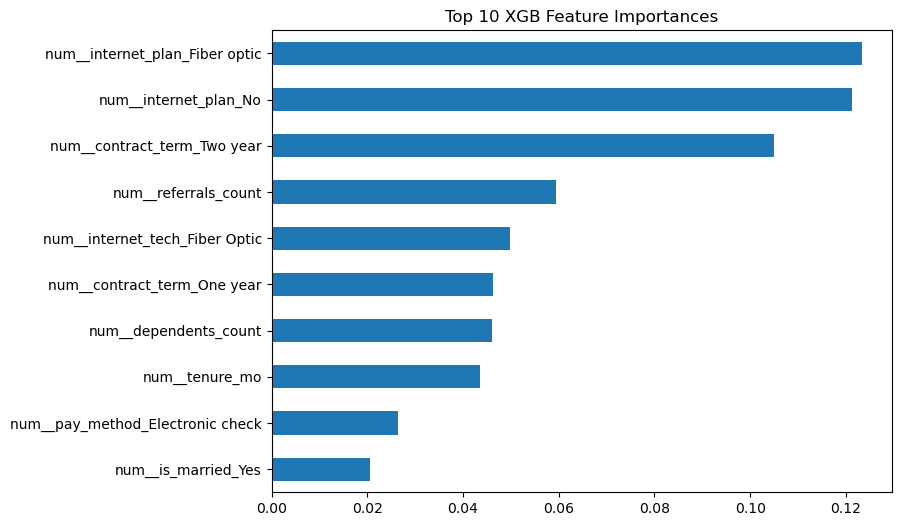

In [29]:
# Get best fitted model from GridSearchCV
best_xgb = xgb_cv.best_estimator_.named_steps["model"]

#get important features
pre = xgb_cv.best_estimator_.named_steps["preprocess"]
feature_names = pre.get_feature_names_out()
imp = pd.Series(best_xgb.feature_importances_, index=feature_names).sort_values(ascending=False)

display(imp.head(10))  # top 10 features


# Optional: plot top features
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
imp.head(10).plot(kind="barh", x="feature", y="importance", legend=False)
plt.title("Top 10 XGB Feature Importances")
plt.gca().invert_yaxis()
plt.show()

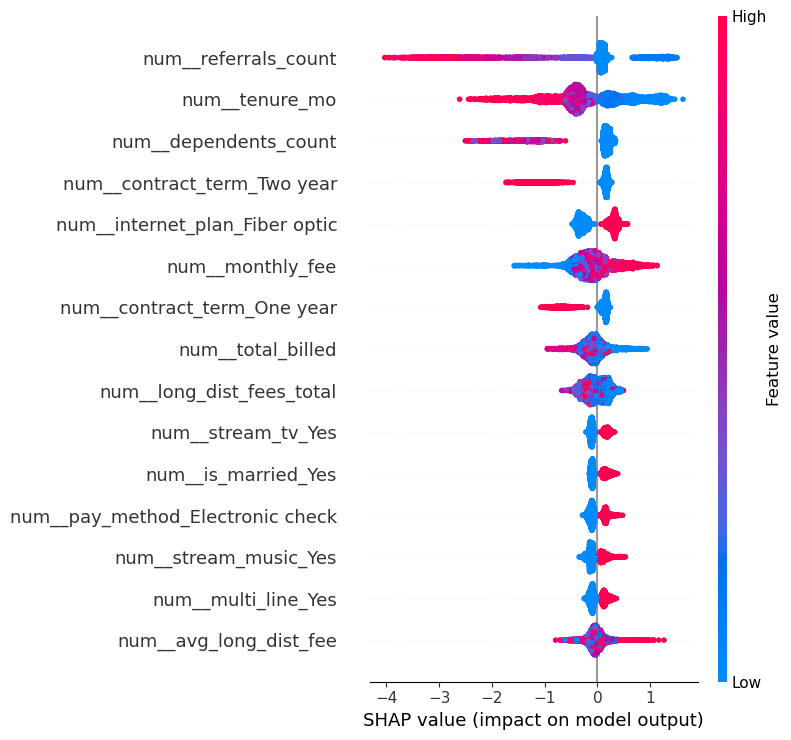

In [30]:
import shap                  

pre = xgb_cv.best_estimator_.named_steps["preprocess"]

#  Transform X the same way the model saw it
X_train_enc = pre.transform(X_train)

#  Get feature names after preprocessing (works for ColumnTransformer / Pipeline in sklearn >= 1.0)
feature_names = None
if hasattr(pre, "get_feature_names_out"):
    feature_names = pre.get_feature_names_out()
    
# Create SHAP explainer for tree-based models (e.g., XGBoost, LightGBM, RandomForest)
explainer   = shap.TreeExplainer(best_xgb)

# Compute SHAP values for the training set
# Each value shows how much a feature pushes a prediction toward class 1 (positive) or class 0 (negative)
shap_values = explainer.shap_values(X_train_enc)

# Overall PLot Beeswarm plot: this shows both which features matter most and the direction of their influence

shap.summary_plot(shap_values, X_train_enc, max_display=15, show=True,feature_names=feature_names)

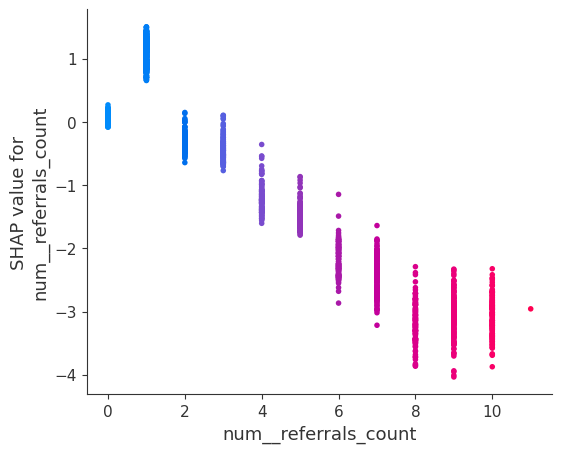

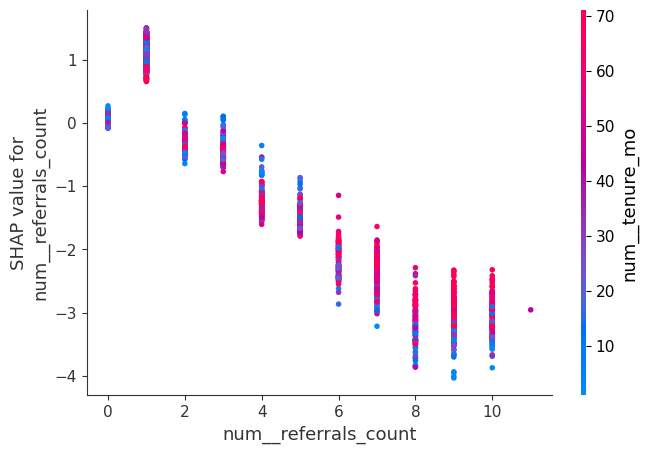

In [31]:
#Dependence plot for one feature
shap.dependence_plot("num__referrals_count", shap_values, X_train_enc, interaction_index="num__referrals_count", show=True,feature_names=feature_names)

# Dependence plot for one feature, colored by another feature
shap.dependence_plot("num__referrals_count", shap_values, X_train_enc, interaction_index="num__tenure_mo", show=True,feature_names=feature_names)

In [32]:
Ytest_prob = xgb_cv.predict_proba(X_test)[:, 1]

Test ROC-AUC: 0.8859


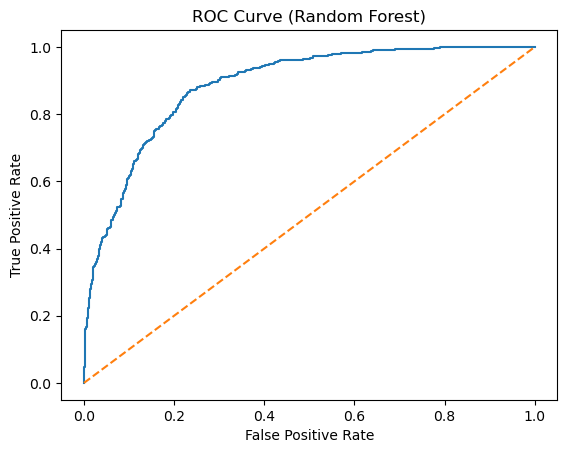

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt  

test_auc = roc_auc_score(Y_test, Ytest_prob)
print("Test ROC-AUC:", round(test_auc, 4))

# ROC curve (single plot; no custom colors)
fpr, tpr, _ = roc_curve(Y_test, Ytest_prob)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Random Forest)")
plt.show()

In [34]:
# Create a small comparison table
comparison = pd.DataFrame({
    'XGBoost_gain_rank': imp.rank(ascending=False),
    'XGBoost_gain_value': imp,
    'SHAP_mean_abs': pd.Series(shap_values.mean(0), index=feature_names).abs().sort_values(ascending=False)
})

print(comparison.head(15))

                                            XGBoost_gain_rank  \
num__add_on_backup_No internet service                   44.0   
num__add_on_backup_Yes                                   36.0   
num__add_on_protection_No internet service               44.0   
num__add_on_protection_Yes                               23.0   
num__add_on_security_No internet service                 44.0   
num__add_on_security_Yes                                 15.0   
num__age_years                                           33.0   
num__avg_gb_download                                     22.0   
num__avg_long_dist_fee                                   30.0   
num__contract_term_One year                               6.0   
num__contract_term_Two year                               3.0   
num__dependents_count                                     7.0   
num__e_bill_opt_in_Yes                                   13.0   
num__extra_data_fees_total                               32.0   
num__gender_Male         

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix
)

# Load
df = pd.read_excel("retentiondata_case (1).xlsx", engine="openpyxl")

# Keep only what we need
sub = df[["monthly_fee", "left_flag"]].copy()
sub["monthly_fee"] = pd.to_numeric(sub["monthly_fee"], errors="coerce")
sub["left_flag"] = sub["left_flag"].astype(str).str.strip()

# Clean / encode target
sub = sub[sub["left_flag"].isin(["Yes", "No"])].dropna()
sub["y"] = sub["left_flag"].map({"No": 0, "Yes": 1}).astype(int)

X = sub[["monthly_fee"]]
y = sub["y"]

# Split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Model
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=1000, solver="lbfgs"))
])

pipe.fit(X_train, y_train)

# Predict
proba = pipe.predict_proba(X_test)[:, 1]
pred  = (proba >= 0.5).astype(int)

# Evaluate
print("Confusion matrix:\n", confusion_matrix(y_test, pred))
print("Accuracy:",  accuracy_score(y_test, pred))
print("Precision:", precision_score(y_test, pred, zero_division=0))
print("Recall:",    recall_score(y_test, pred))
print("F1:",        f1_score(y_test, pred))
print("ROC AUC:",   roc_auc_score(y_test, proba))

FileNotFoundError: [Errno 2] No such file or directory: 'retentiondata_case (1).xlsx'